In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from fonctions_maison import *
plt.style.use(["science","notebook","grid"])

# Importation des données

In [2]:
N_ab, N_AB, N_aB, N_Ab = np.loadtxt("Données/S2.txt", delimiter="/", unpack = True, skiprows = 2) #où a=a, A=a', b=b, B=b'; i.e. a et b = vertical et A et B = horizontal
b_a0, N_a0 = np.loadtxt("Données/a-0.txt", unpack = True, skiprows = 2)
b_a45, N_a45 = np.loadtxt("Données/a-45.txt", unpack = True, skiprows = 2)
b_a90, N_a90 = np.loadtxt("Données/a-90.txt", unpack = True, skiprows = 2)
b_a135, N_a135 = np.loadtxt("Données/a-135.txt", unpack = True, skiprows = 2)
angle, N_0_a, N_0_b, N_0, N_45_a, N_45_b, N_45, N_225_a, N_225_b, N_225 = np.loadtxt("Données/data1.txt", unpack = True)

# Nos données

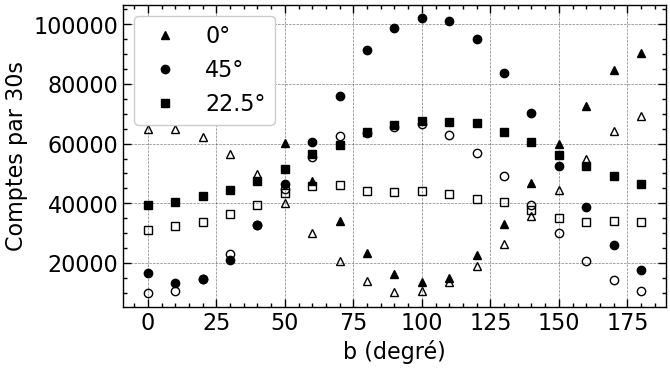

In [62]:
plt.figure(0, figsize=(7,4), dpi=100)
plt.xlabel("b (degré)")
plt.ylabel("Comptes par 30s")

plt.plot(angle, N_0_a, ls="none", marker="^", mec="black", mfc="none")
plt.plot(angle, N_0_b, ls="none", marker="^", mec="black", mfc="black", label="0°")
plt.plot(angle, N_45_a, ls="none", marker="o", mec="black", mfc="none")
plt.plot(angle, N_45_b, ls="none", marker="o", mec="black", mfc="black", label="45°")
plt.plot(angle, N_225_a, ls="none", marker="s", mec="black", mfc="none")
plt.plot(angle, N_225_b, ls="none", marker="s", mec="black", mfc="black", label="22.5°")
plt.legend()
plt.savefig("comptes_a_b", bbox_inches="tight")

# 4 Courbes de $\beta$ en fct de $\alpha$

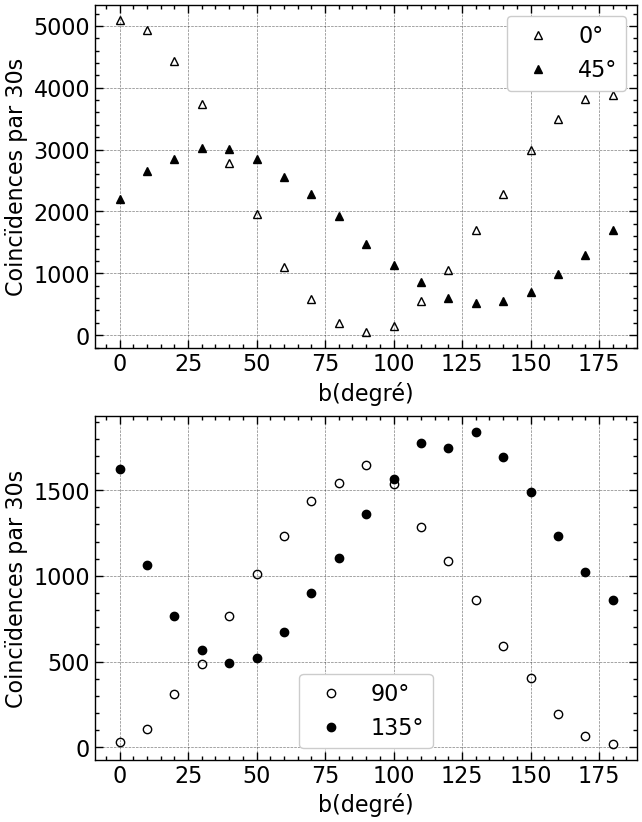

In [4]:
fig, axes = plt.subplots(2,figsize=(7,10) , dpi=100)
ax1, ax2 = axes[0], axes[1]

ax1.set_xlabel("b(degré)")
ax1.set_ylabel("Coincïdences par 30s")
ax2.set_xlabel("b(degré)")
ax2.set_ylabel("Coincïdences par 30s")

ax1.plot(b_a0, N_a0, ls="none", marker="^", mec="black", mfc="none", label="0°")
ax1.plot(b_a45, N_a45, ls="none", marker="^", mec="black", mfc="black", label="45°")
ax1.legend()
ax2.plot(b_a90, N_a90, ls="none", marker="o", mec="black", mfc="none", label="90°")
ax2.plot(b_a135, N_a135, ls="none", marker="o", mec="black", mfc="black", label="135°")

ax2.legend()
plt.show()

### `Curve_fit` de $N(\alpha, \beta)$

In [4]:
from scipy.optimize import curve_fit

####Fonction à optimiser
#a = 0 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
def Nb_coincidences(b, A, theta, phi, C):
    return A*((np.sin(a)**2)*(np.sin(b)**2)*(np.cos(theta)**2)
              + (np.cos(a)**2)*(np.cos(b)**2)*(np.sin(theta)**2)
              + (1/4)*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi)) + C

$\alpha = 0^o$ et $\alpha = 45^o$

c:\Users\pierr\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


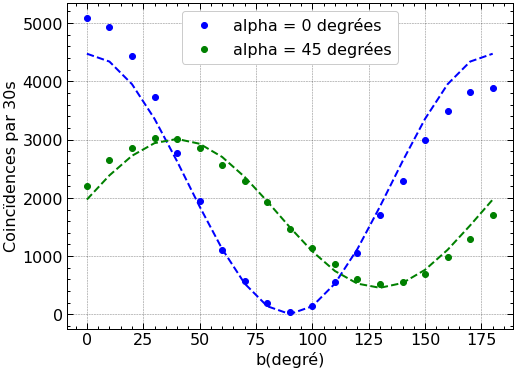

c:\Users\pierr\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


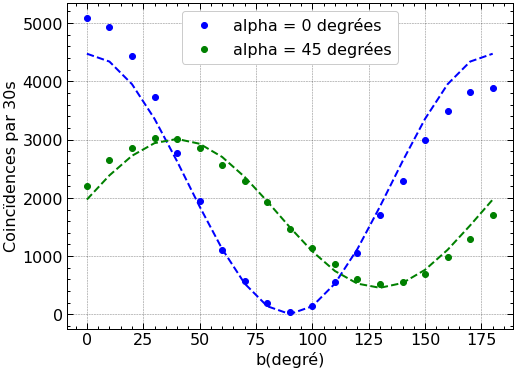

alpha = 0, A = 5716.874201267373, theta = 62.101891842652606, phi = 26.0, C = 6.691474001867808
alpha = 45, A = 5303.704890346955, theta = 50.153670841079, phi = 15.943108756510462, C = 407.74505233757395


In [6]:
b_a0, N_a0 = np.loadtxt("Données/a-0.txt", unpack = True, skiprows = 2)
b_a45, N_a45 = np.loadtxt("Données/a-45.txt", unpack = True, skiprows = 2)

b_a0 *= np.pi/180
a = 0 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
a0_guess = [5560,46 * (np.pi/180),26 * (np.pi/180),22]
a0_popt = curve_fit(Nb_coincidences, b_a0, N_a0, a0_guess)

A, theta, phi, C = a0_popt[0]
y_fit_0 = Nb_coincidences(b_a0, A, theta, phi, C)


b_a45 *= np.pi/180
a = 45 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
a45_guess = [5560,46 * (np.pi/180),26 * (np.pi/180),22]
a45_popt = curve_fit(Nb_coincidences, b_a45, N_a45, a45_guess)

A, theta, phi, C = a45_popt[0]
y_fit_45 = Nb_coincidences(b_a45, A, theta, phi, C)

plt.plot(b_a0*(180/np.pi),N_a0,"bo",label="alpha = 0 degrées")
plt.plot(b_a0*(180/np.pi),y_fit_0,"b--")
plt.plot(b_a45*(180/np.pi),N_a45,"go",label="alpha = 45 degrées")
plt.plot(b_a45*(180/np.pi),y_fit_45,"g--")
plt.xlabel("b(degré)")
plt.ylabel("Coincïdences par 30s")
plt.legend()
plt.show()

b_a0, N_a0 = np.loadtxt("Données/a-0.txt", unpack = True, skiprows = 2)
b_a45, N_a45 = np.loadtxt("Données/a-45.txt", unpack = True, skiprows = 2)

b_a0 *= np.pi/180
a = 0 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
a0_guess = [5560,46 * (np.pi/180),26 * (np.pi/180),22]
a0_popt = curve_fit(Nb_coincidences, b_a0, N_a0, a0_guess)

A, theta, phi, C = a0_popt[0]
y_fit_0 = Nb_coincidences(b_a0, A, theta, phi, C)


b_a45 *= np.pi/180
a = 45 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
a45_guess = [5560,46 * (np.pi/180),26 * (np.pi/180),22]
a45_popt = curve_fit(Nb_coincidences, b_a45, N_a45, a45_guess)

A, theta, phi, C = a45_popt[0]
y_fit_45 = Nb_coincidences(b_a45, A, theta, phi, C)

plt.plot(b_a0*(180/np.pi),N_a0,"bo",label="alpha = 0 degrées")
plt.plot(b_a0*(180/np.pi),y_fit_0,"b--")
plt.plot(b_a45*(180/np.pi),N_a45,"go",label="alpha = 45 degrées")
plt.plot(b_a45*(180/np.pi),y_fit_45,"g--")
plt.xlabel("b(degré)")
plt.ylabel("Coincïdences par 30s")
plt.legend()
plt.show()

print(f"alpha = {0}, A = {a0_popt[0][0]}, theta = {a0_popt[0][1]*(180/np.pi)}, phi = {a0_popt[0][2]*(180/np.pi)}, C = {a0_popt[0][3]}")
print(f"alpha = {45}, A = {a45_popt[0][0]}, theta = {a45_popt[0][1]*(180/np.pi)}, phi = {a45_popt[0][2]*(180/np.pi)}, C = {a45_popt[0][3]}")

$\alpha = 45^o$ et $\alpha = 135^o$

c:\Users\pierr\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


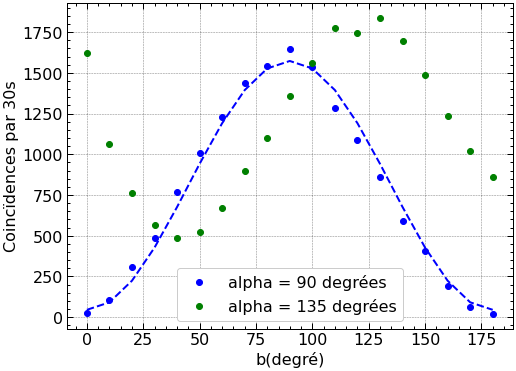

alpha = 90, A = 6672.255383347343, theta = 61.41509631711282, phi = 26.0, C = 45.158707179522324
alpha = 135, A = 91553622.30285183, theta = -22949.902471877336, phi = 132.32, C = 1046.2400938919425


In [19]:
b_a90, N_a90 = np.loadtxt("Données/a-90.txt", unpack = True, skiprows = 2)
b_a135, N_a135 = np.loadtxt("Données/a-135.txt", unpack = True, skiprows = 2)

b_a90 *= np.pi/180
a = 90 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
a90_guess = [5560,46 * (np.pi/180),26 * (np.pi/180),22]
a90_popt = curve_fit(Nb_coincidences, b_a90, N_a90, a90_guess)

A, theta, phi, C = a90_popt[0]
y_fit_45 = Nb_coincidences(b_a90, A, theta, phi, C)

b_a135 *= np.pi/180
a = 90 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
a135_guess = [89922 ,325.86* (np.pi/180),132.32 * (np.pi/180),12119]
a135_popt = curve_fit(Nb_coincidences, b_a135, N_a135, a135_guess)

A, theta, phi, C = a135_popt[0]
y_fit_135 = Nb_coincidences(b_a135, A, theta, phi, C)

plt.plot(b_a90*(180/np.pi),N_a90,"bo",label="alpha = 90 degrées")
plt.plot(b_a90*(180/np.pi),y_fit_45,"b--")
plt.plot(b_a135*(180/np.pi),N_a135,"go",label="alpha = 135 degrées")
#plt.plot(b_a135,y_fit_135,"g--")
plt.xlabel("b(degré)")
plt.ylabel("Coincïdences par 30s")
plt.legend()
plt.show()

print(f"alpha = {90}, A = {a90_popt[0][0]}, theta = {a90_popt[0][1]*(180/np.pi)}, phi = {a90_popt[0][2]*(180/np.pi)}, C = {a90_popt[0][3]}")
print(f"alpha = {135}, A = {a135_popt[0][0]}, theta = {a135_popt[0][1]*(180/np.pi)}, phi = {a135_popt[0][2]*(180/np.pi)}, C = {a135_popt[0][3]}")

# 2 Courbes pour S

alpha = 45, A = 6672.255383347343, theta = 61.41509631711282, phi = 26.0, C = 45.158707179522324

alpha = -45, A = 5303.704890346955, theta = 50.153670841079, phi = 15.943108756510462, C = 407.74505233757395

c:\Users\pierr\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\pierr\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


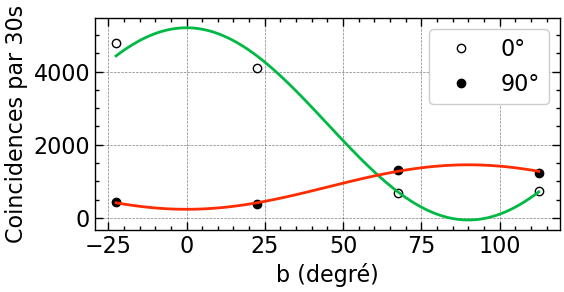

c:\Users\pierr\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\pierr\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


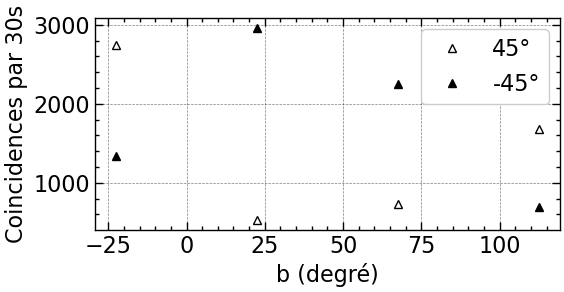

alpha = 0, A = 6738.151886379968, theta = 61.92802839221116, phi = 26.0, C = -51.76260478923507
alpha = 90, A = 5199.582181606105, theta = 61.11340527283206, phi = 26.0, C = 240.80238422255252
alpha = 45, A = -10579.991713310623, theta = -87303.69629666227, phi = 109658.91364103001, C = 5216.2479283276425
alpha = -45, A = -10612.543481090353, theta = -85315.67893079358, phi = 155651.62409599652, C = 5224.385870272742


In [26]:
b = np.array([-22.5, 22.5, 67.5, 112.5])
N_moins_45 = np.array([N_ab[1], N_ab[0], N_aB[1], N_aB[0]])
N_0 = np.array(       [N_ab[3], N_ab[2], N_aB[3], N_aB[2]])
N_45 = np.array(      [N_Ab[1], N_Ab[0], N_AB[1], N_AB[0]])
N_90 = np.array(      [N_Ab[3], N_Ab[2], N_AB[3], N_AB[2]])

E_ab = ( N_ab[0] + N_AB[0] - N_aB[0] - N_Ab[0] ) / ( N_ab[0] + N_AB[0] + N_aB[0] + N_Ab[0] )
E_aB = ( N_ab[1] + N_AB[1] - N_aB[1] - N_Ab[1] ) / ( N_ab[1] + N_AB[1] + N_aB[1] + N_Ab[1] )
E_Ab = ( N_ab[2] + N_AB[2] - N_aB[2] - N_Ab[2] ) / ( N_ab[2] + N_AB[2] + N_aB[2] + N_Ab[2] )
E_AB = ( N_ab[3] + N_AB[3] - N_aB[3] - N_Ab[3] ) / ( N_ab[3] + N_AB[3] + N_aB[3] + N_Ab[3] )
S = E_ab - E_aB + E_Ab + E_AB

plt.figure(2 ,figsize=(6,2.8) , dpi=100)
b *= np.pi/180
a = 0 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
a0_guess = [5560,46 * (np.pi/180),26 * (np.pi/180),22]
a0_popt = curve_fit(Nb_coincidences, b, N_0, a0_guess)

A, theta, phi, C = a0_popt[0]
b_fit = np.linspace(np.min(b),np.max(b),100)
y_fit_0 = Nb_coincidences(b_fit, A, theta, phi, C)
plt.plot(b*(180/np.pi), N_0, ls="none", marker="o", mec="black", mfc="none", label="0°")
plt.plot(b_fit*(180/np.pi),y_fit_0 ,  mec="black", mfc="none")

a = 90 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
a90_guess = [5560,46 * (np.pi/180),26 * (np.pi/180),22]
a90_popt = curve_fit(Nb_coincidences, b, N_90, a90_guess)

A, theta, phi, C = a90_popt[0]
y_fit_90 = Nb_coincidences(b_fit, A, theta, phi, C)
plt.plot(b*(180/np.pi), N_90, ls="none", marker="o", mec="black", mfc="black", label = "90°")
plt.plot(b_fit*(180/np.pi),y_fit_90 , mec="black", mfc="none")

plt.xlabel("b (degré)")
plt.ylabel("Coincidences par 30s")
plt.legend()
plt.show()


plt.figure(3 ,figsize=(6,2.8) , dpi=100)
plt.xlabel("b (degré)")
plt.ylabel("Coincidences par 30s")

a = 45 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
a45_guess = [3,500 * (np.pi/180),26 * (np.pi/180),22]
a45_popt = curve_fit(Nb_coincidences, b, N_0, a45_guess)

A, theta, phi, C = a45_popt[0]
y_fit_45 = Nb_coincidences(b_fit, A, theta, phi, C)
plt.plot(b*(180/np.pi), N_45, ls="none", marker="^", mec="black", mfc="none", label="45°")
#plt.plot(b_fit*(180/np.pi),y_fit_45 ,  mec="black", mfc="none")



a = -45 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
am45_guess = [3,500 * (np.pi/180),26 * (np.pi/180),500]
am45_popt = curve_fit(Nb_coincidences, b, N_0, am45_guess)

A, theta, phi, C = a45_popt[0]
y_fit_m45 = Nb_coincidences(b_fit, A, theta, phi, C)
plt.plot(b*(180/np.pi), N_moins_45, ls="none", marker="^", mec="black", mfc="black", label="-45°")
#plt.plot(b_fit*(180/np.pi),y_fit_m45 ,  mec="black", mfc="none")

plt.legend()
plt.show()

print(f"alpha = {0}, A = {a0_popt[0][0]}, theta = {a0_popt[0][1]*(180/np.pi)}, phi = {a0_popt[0][2]*(180/np.pi)}, C = {a0_popt[0][3]}")
print(f"alpha = {90}, A = {a90_popt[0][0]}, theta = {a90_popt[0][1]*(180/np.pi)}, phi = {a90_popt[0][2]*(180/np.pi)}, C = {a90_popt[0][3]}")
print(f"alpha = {45}, A = {a45_popt[0][0]}, theta = {a45_popt[0][1]*(180/np.pi)}, phi = {a45_popt[0][2]*(180/np.pi)}, C = {a45_popt[0][3]}")
print(f"alpha = {-45}, A = {am45_popt[0][0]}, theta = {am45_popt[0][1]*(180/np.pi)}, phi = {am45_popt[0][2]*(180/np.pi)}, C = {am45_popt[0][3]}")

(array([5.19958218e+03, 1.06663014e+00, 4.53785606e-01, 2.40802384e+02]),
 array([[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]]))

In [21]:
2*522*(1/2.0839)

500.9837324247805